In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the URL
url = 'https://raw.githubusercontent.com/Naik-Khyati/608/main/story3/input/death_rate_gun_laws.csv'

# Read the CSV data into a DataFrame
df = pd.read_csv(url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   state_abbrev      50 non-null     object 
 1   RATE              50 non-null     float64
 2   DEATHS            50 non-null     int64  
 3   state_name        50 non-null     object 
 4   nbr_gun_policies  50 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [4]:
# we divide the data into 5 equal parts based on the percentiles (0%, 20%, 40%, 60%, 80%, and 100%).
bin_edges = np.percentile(df['nbr_gun_policies'], np.linspace(0, 100, 6))

# Create bin labels
labels = ['Very Lax', 'Lax', 'Moderate', 'Strict', 'Very Strict']

# Cut the data into bins using calculated edges
df['Likert_Scale'] = pd.cut(df['nbr_gun_policies'], bins=bin_edges, labels=labels, include_lowest=True)

In [5]:
# Calculate the frequency of each category in the Likert Scale column
likert_scale_freq = df['Likert_Scale'].value_counts()

# Print the frequency
print(likert_scale_freq)

Very Lax       12
Moderate       11
Very Strict    10
Lax             9
Strict          8
Name: Likert_Scale, dtype: int64


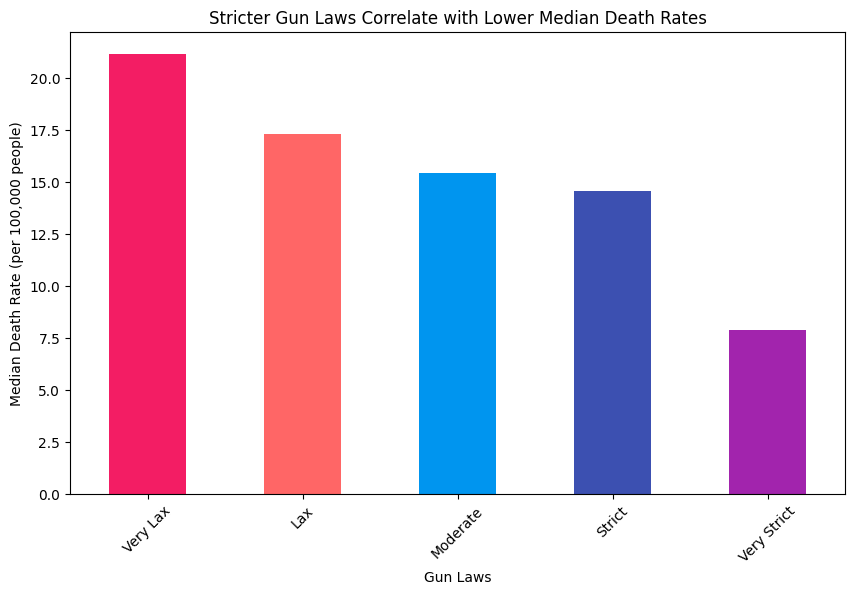

In [6]:
# Define a color mapping for Gun Laws (Likert scale categories)
gun_laws_colors = {
    'Very Lax': '#F31D64',         # Very Lax
    'Lax': '#FF6666',              # Lax
    'Moderate': '#0095EF',         # Moderate
    'Strict': '#3C50B1',           # Strict
    'Very Strict': '#A224AD'       # Very Strict
}

# Calculate the median death rate for each Likert scale category
med_death_rate_by_likert = df.groupby('Likert_Scale')['RATE'].median()


# Plot the bar chart with custom colors
plt.figure(figsize=(10, 6))
med_death_rate_by_likert.plot(kind='bar', color=[gun_laws_colors[l] for l in med_death_rate_by_likert.index])
plt.title('Stricter Gun Laws Correlate with Lower Median Death Rates')
plt.xlabel('Gun Laws')
plt.ylabel('Median Death Rate (per 100,000 people)')
plt.xticks(rotation=45)
plt.show()

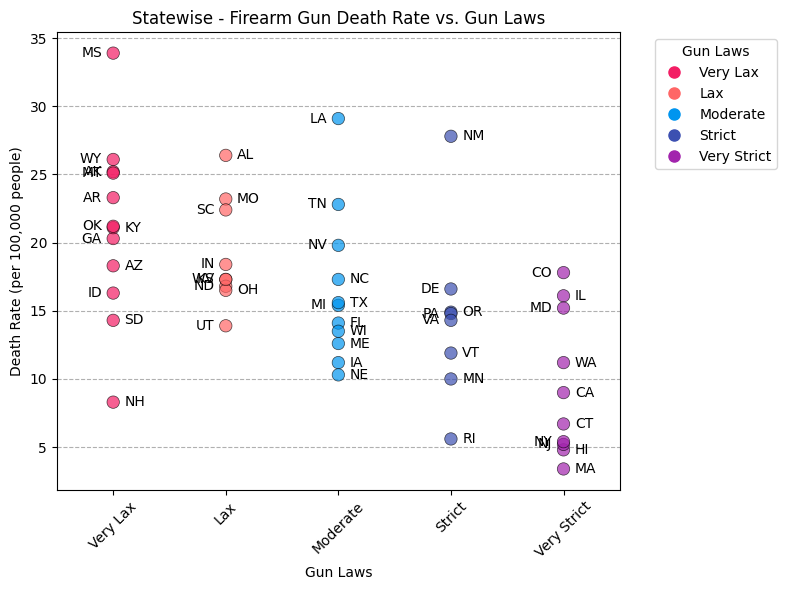

In [7]:
# Define a color mapping for Gun Laws (Likert scale categories)
gun_laws_colors = {
    'Very Lax': '#F31D64',         # Very Lax
    'Lax': '#FF6666',              # Lax
    'Moderate': '#0095EF',         # Moderate
    'Strict': '#3C50B1',           # Strict
    'Very Strict': '#A224AD'       # Very Strict
}

# Map Gun Laws (Likert scale values) to colors for each data point
colors = df['Likert_Scale'].map(gun_laws_colors)

# Define the Likert scale order and corresponding positions
likert_order = ['Very Lax', 'Lax', 'Moderate', 'Strict', 'Very Strict']
likert_positions = list(range(1, len(likert_order) + 1))

# Map Likert scale values to their positions
df['Likert_Position'] = df['Likert_Scale'].apply(lambda x: likert_positions[likert_order.index(x)])

# Create the scatter plot with Likert scale on the x-axis
plt.figure(figsize=(8, 6))  # Adjust the figure size
scatter = plt.scatter(df['Likert_Position'], df['RATE'], c=colors, s=80, alpha=0.7, edgecolors='k', linewidths=0.5, marker='o', zorder=2)

# Create a custom legend based on gun_laws_colors
legend_labels = gun_laws_colors.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=8, label=label, linestyle='None') for label, color in gun_laws_colors.items()]
plt.legend(handles=legend_handles, labels=legend_labels, title='Gun Laws', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display state labels to alternate between left and right of the bubbles
for i, txt in enumerate(df['state_abbrev']):
    position = df['Likert_Position'][i]
    x_offset = 0.1 if i % 2 == 0 else -0.1  # Alternate label position based on index
    plt.annotate(txt, (position + x_offset, df['RATE'][i]), fontsize=10, ha='left' if i % 2 == 0 else 'right', va='center')

# Adjust x-axis limits to reduce the gap
plt.xlim(min(likert_positions) - 0.5, max(likert_positions) + 0.5)

plt.title('Statewise - Firearm Gun Death Rate vs. Gun Laws')
plt.xlabel('Gun Laws')
plt.ylabel('Death Rate (per 100,000 people)')
plt.grid(True, axis='y', linestyle='--', zorder=1)
plt.xticks(likert_positions, likert_order, rotation=45)  # Rotate x-axis labels by 45 degrees for readability
plt.tight_layout()

plt.show()


In [8]:
b_parameters = {
    "B_1":"D158.V9-level1",
    "B_2": "*None*",
    "B_3": "*None*",
    "B_4": "*None*",
    "B_5": "*None*"
}

m_parameters = {
    "M_1": "D158.M1",
    "M_2": "D158.M2",
    "M_3": "D158.M3"
}

f_parameters = {
    "F_D158.V1": ["2021"],
    "F_D158.V10": ["*All*"],
    "F_D158.V2": ["U01.4"],
    "F_D158.V25": ["*All*"],
    "F_D158.V27": ["*All*"],
    "F_D158.V30": ["*All*"],
    "F_D158.V31": ["*All*"],
    "F_D158.V9": ["*All*"]
}

i_parameters = {
    "I_D158.V1": "2021",
    "I_D158.V10": "*All*",
    "I_D158.V2": "U01.4 (Terrorism involving firearms)",
    "I_D158.V25": "All Causes of Death",
    "I_D158.V27": "*All* (The United States)",
    "I_D158.V30": "*All* (The United States)",
    "I_D158.V31": "*All* (The United States)",
    "I_D158.V9": "*All* (The United States)"
}

o_parameters = {
    "O_V10_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V1_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V25_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V27_fmode": "freg",    # Use regular finder and ignore v parameter value
    "O_V2_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V30_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V31_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_V9_fmode": "freg",     # Use regular finder and ignore v parameter value
    "O_aar": "aar_none",       # age-adjusted rates
    "O_aar_pop": "0000",      # population selection for age-adjusted rates
    "O_age": "D158.V5",        # select age-group (e.g. ten-year, five-year, single-year, infant groups)
    "O_oc-sect1-request": "close",     # Set to on by default
    "O_precision": "1",       # decimal places
    "O_javascript": "on",     # Set to on by default
    "O_race": "D158.V42",   # select location variable to use (e.g. state/county, census, hhs regions)
    "O_rate_per": "100000",   # rates calculated per X persons
    "O_show_totals": "false",  # Show totals for
    "O_timeout": "600",
    "O_title": "",    # title for data run
    "O_ucd": "D158.V2",        # select underlying cause of death category
    "O_urban": "D158.V19"      # select urbanization category
}


vm_parameters = {
    "VM_D158.M6_D158.V10": "",        # Location
    "VM_D158.M6_D158.V17": "*All*",   # Hispanic-Origin
    "VM_D158.M6_D158.V1_S": "*All*",  # Year
    "VM_D158.M6_D158.V42": "*All*",    # Gender
    "VM_D158.M6_D158.V7": "*All*"     # Race
}

v_parameters = {
    "V_D158.V1": "",         # Year/Month
    "V_D158.V10": "",        # Census Regions
    "V_D158.V11": "*All*",   # 2006 Urbanization
    "V_D158.V12": "*All*",   # ICD-10 130 Cause List (Infants)
    "V_D158.V17": "*All*",   # Hispanic Origin
    "V_D158.V19": "*All*",   # 2013 Urbanization
    "V_D158.V2": "",         # ICD-10 Codes
    "V_D158.V20": "*All*",   # Autopsy
    "V_D158.V21": "*All*",   # Place of Death
    "V_D158.V22": "*All*",   # Injury Intent
    "V_D158.V23": "*All*",   # Injury Mechanism and All Other Leading Causes
    "V_D158.V24": "*All*",   # Weekday
    "V_D158.V25": "",   # Drug/Alcohol Induced Causes
    "V_D158.V27": "",        # HHS Regions
    "V_D158.V30": "",        # HHS Regions
    "V_D158.V31": "",        # HHS Regions
    "V_D158.V4": "*All*",    # ICD-10 113 Cause List
    "V_D158.V42": "*All*",    # ICD-10 113 Cause List
    "V_D158.V43": "*All*",    # ICD-10 113 Cause List
    "V_D158.V44": "*All*",    # ICD-10 113 Cause List
    "V_D158.V5": "*All*",    # ICD-10 113 Cause List
    "V_D158.V51": "*All*",   # Five-Year Age Groups
    "V_D158.V52": "*All*",   # Single-Year Ages
    "V_D158.V6": "00",       # Infant Age Groups
    "V_D158.V7": "*All*",    # Gender
    "V_D158.V9": ""          # State/County
}

misc_parameters = {
    "action-Send": "Send",
    "finder-stage-D158.V1": "codeset",
    "finder-stage-D158.V10": "codeset",
    "finder-stage-D158.V2": "codeset",
    "finder-stage-D158.V25": "codeset",
    "finder-stage-D158.V27": "codeset",
    "finder-stage-D158.V30": "codeset",
    "finder-stage-D158.V9": "codeset",
    "stage": "request"
}

In [9]:
def createParameterList(parameterList):
    """Helper function to create a parameter list from a dictionary object"""

    parameterString = ""

    for key in parameterList:
        parameterString += "<parameter>\n"
        parameterString += "<name>" + key + "</name>\n"

        if isinstance(parameterList[key], list):
            for value in parameterList[key]:
                parameterString += "<value>" + value + "</value>\n"
        else:
            parameterString += "<value>" + parameterList[key] + "</value>\n"

        parameterString += "</parameter>\n"

    return parameterString

In [10]:
xml_request = "<request-parameters>\n"
xml_request += createParameterList(b_parameters)
xml_request += createParameterList(m_parameters)
xml_request += createParameterList(f_parameters)
xml_request += createParameterList(i_parameters)
xml_request += createParameterList(o_parameters)
xml_request += createParameterList(vm_parameters)
xml_request += createParameterList(v_parameters)
xml_request += createParameterList(misc_parameters)
xml_request += "</request-parameters>"

In [11]:
import requests

url = "https://wonder.cdc.gov/controller/datarequest/D158"
response = requests.post(url, data={"request_xml": xml_request, "accept_datause_restrictions": "true"})

if response.status_code == 200:
    data = response.text
else:
    print("something went wrong")

ConnectionError: ignored

In [13]:
import requests

# Define the URL for the CDC's data endpoint
url = "https://wonder.cdc.gov/controller/datarequest/D158"

# Make an HTTP GET request
response = requests.get(url)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    # Parse the JSON response or other data format
    data = response.json()
    # Process and analyze the data as needed
else:
    print("Failed to fetch data. HTTP status code:", response.status_code)


ConnectionError: ignored